In [2]:
import numpy as np
import matplotlib.pyplot as plt

Question 1

In [2]:

n = 26e6

searches = [1.0e3, 1.0e4, 1.0e5]
for m in searches:

    Linear_search_time = m * 1.0e-8 * n
    Binary_search_time = m * 1.0e-6 * np.log(n) + 2.0e-5 * n * np.log(n)

    print("Number of searches =", m)
    print("Linear search time: ", Linear_search_time)
    print("Binary search time: ", Binary_search_time)


Number of searches = 1000.0
Linear search time:  260.0
Binary search time:  8878.29276351969
Number of searches = 10000.0
Linear search time:  2600.0
Binary search time:  8878.446425983555
Number of searches = 100000.0
Linear search time:  26000.0
Binary search time:  8879.983050622193


For a small number of searches, linear search is faster, however, for a larger number of searches binary search is faster.

The number of searches where binary becomes faster than linear search is when the Linear_search_time = Binary_search_time \

$ => 10^{-8} m n = 10^{-6} m \log(n) + 2\times 10^{-5}  n \log(n) $ \

$ => m ( 10^{-8} n - 10^{-6} \log(n)) = 2\times 10^{-5}  n \log(n) $ \

$ => m = \cfrac{ 2\times 10^{-5}  n \log(n) }{ 10^{-8} n - 10^{-6} \log(n) }$


In [3]:
m = (2.0e-5 * n * np.log(n)) / (1.0e-8 * n - 1.0e-6 * np.log(n))
print(m)

34149.45670891916


Question 2

Fast checks:
Check that both matrices are square and they are the same shape O(1)

Slow checks:
Check each if each item in A + B is real O(n^2)


In [4]:

def evals(A, B):
    return np.linalg.eigvals(A + B)

a = 21
b = 67

A_diagonal = np.random.rand(10)
B_diagonal = np.random.rand(10)

A = np.diag(A_diagonal)
B = np.diag(B_diagonal)

assert np.allclose(sorted(evals(A, B)), sorted(A_diagonal + B_diagonal))


Taylor series expansion for $ f(x+h) $

$ f(x+h) = f(x)+hf'(x)+\cfrac{h^2}{2!}f''(x)+\cfrac{h^3}{3!}f'''(x)$ \

$ Substituting in for one sided difference

$ \cfrac{df(x)}{dx} \approx \cfrac{f(x+h)-f(x)}{j}$ \

$ = \cfrac{f(x)+hf'(x)+\mathcal{O}(h^2) - f(x)}{h}  $ \

$ = f'(x) + \mathcal{O} $

Therefor the error in the derivative is proportional to the error in the original taylor series
For symmetrical difference

$ \cfrac{df(x)}{dx} \approx \cfrac{f(x+h)-f(x-h)}{2h} $ \

$ = \cfrac{ ( f(x)+hf'(x)+\cfrac{h^2}{2!}f''(x) + \mathcal{O}(h^3)) - ( f(x)-hf'(x)+\cfrac{h^2}{2!}f''(x) + \mathcal{O}(h^3))}{2h} $ \

$ = f'(x) + \mathcal{O}(h^2) $

Error in $f'(x)$ proportional to the error in $f(x)$ squared \
For example if the error in $f(x)$ halved, the error in $f'(x)$ would quarter

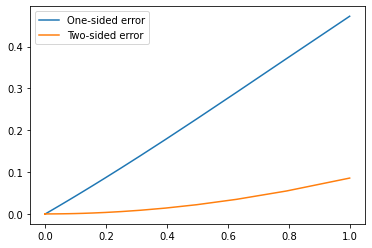

In [5]:

def one_sided_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def two_sided_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

H = np.logspace(-10, 0, num=100)
x = 1.0

f = lambda y: np.sin(y)

one_sided_errors = []
two_sided_errors = []

for h in H:

    one_sided_error = abs(one_sided_difference(f, x, h) - np.cos(x))
    one_sided_errors.append(one_sided_error)
    two_sided_error = abs(two_sided_difference(f, x, h) - np.cos(x))
    two_sided_errors.append(two_sided_error)

    #print("h =", h)
    #print("One-sided error: ", one_sided_error)
    #print("Two-sided error: ", two_sided_error)

plt.plot(H, one_sided_errors, label="One-sided error")
plt.plot(H, two_sided_errors, label="Two-sided error")
plt.legend()



In [1]:
import sympy



x = sympy.Symbol('x')
y = x**2 * sympy.sin(x**2)
yprime = y.diff(x)
print("dy/dx =",yprime)

f = lambda y: y**2 * np.sin(y**2)
def complex_step_method(f, x, h):
    return np.imag(f(x + 1.0j * h)) / h

Xinputs = [10, 100, 1000, 1000, 10000]
H = [1.0e-9, 1.0e-12, 1.0e-15]


fig, ax = plt.subplots(len(H), sharex = True)

for h in H:
    complex_step_errors = []
    for xin in Xinputs:
        complex_step_error = abs(complex_step_method(f, xin, h) - yprime.evalf(subs={x: xin}))
        complex_step_errors.append(complex_step_error)
        print("h =", h, "x =", xin, "error =", complex_step_error)
    ax[H.index(h)].plot(Xinputs, complex_step_errors, label="h = %g" % h)

dy/dx = 2*x**3*cos(x**2) + 2*x*sin(x**2)


NameError: name 'plt' is not defined